# Define the path to the source code and import the package

In [1]:
import sys
# This path should be the path to the package. Packaging of the program is not yet implemented.
path_to_package = 'C:/Users/Bart/bactoscoop'
sys.path.append(path_to_package + '/src/')
# Get the parent directory of the current script
import bactoscoop
import bactoscoop.plot as bplt

# Folder Structure

The structure of your `example_data` folder should look like this:

example_data  
├── masks  
│   ├── image_name_XY0_C1_cp_masks.tif  
│   ├── ...  
├── image_name_XY0_C1.tif  
├── image_name_XY1_C1.tif  
├── image_name_XY2_C1.tif  
├── ...  

In [2]:
### Loading images and initializing ImageCollection object ---------------------------------------------------------------------------
name= "/example_data"

# The path to our example data happens to be in the same directory as the script, but you can specify any path you like
folder_path =  path_to_package + name

# The channel you specify will be the part the algorithm looks for right before .tif (i.e. c1.tif if channel1 = 'c1')
channel1 = 'C1'
ic = bactoscoop.ImageCollection(folder_path, px = 0.065) # you can adjust the conversion factor with px

In [3]:
# Segmentation of channel1 images. If you have masks you can also skip this step. The masks should be in a folder called 'masks' one level down and have the same name as the images.

ic.load_phase_images(phase_channel=channel1)
n = len(ic.images)
ic.segment_images(n = range(n), 
                  minsize = 100, # minimum size of masks in pixels
                  mask_thresh = 1) # Increasing this parameter will make the mask smaller, decreasing bigger


2024-09-11 15:27:34,638 [INFO] Only one TIFF file found in folder: C:/Users/Bart/bactoscoop/example_data
2024-09-11 15:27:34,887 [INFO] ** TORCH GPU version installed and working. **
>>> GPU activated? True
2024-09-11 15:27:34,889 [INFO] >>bact_phase_omni<< model set to be used
2024-09-11 15:27:34,889 [INFO] ** TORCH GPU version installed and working. **
2024-09-11 15:27:34,889 [INFO] >>>> using GPU


2024-09-11 15:27:48,138 [INFO] Only one TIFF file found in folder: C:/Users/Bart/bactoscoop/example_data/masks


2024-09-11 15:27:48,160 [INFO] Only one TIFF file found in folder: C:/Users/Bart/bactoscoop/example_data


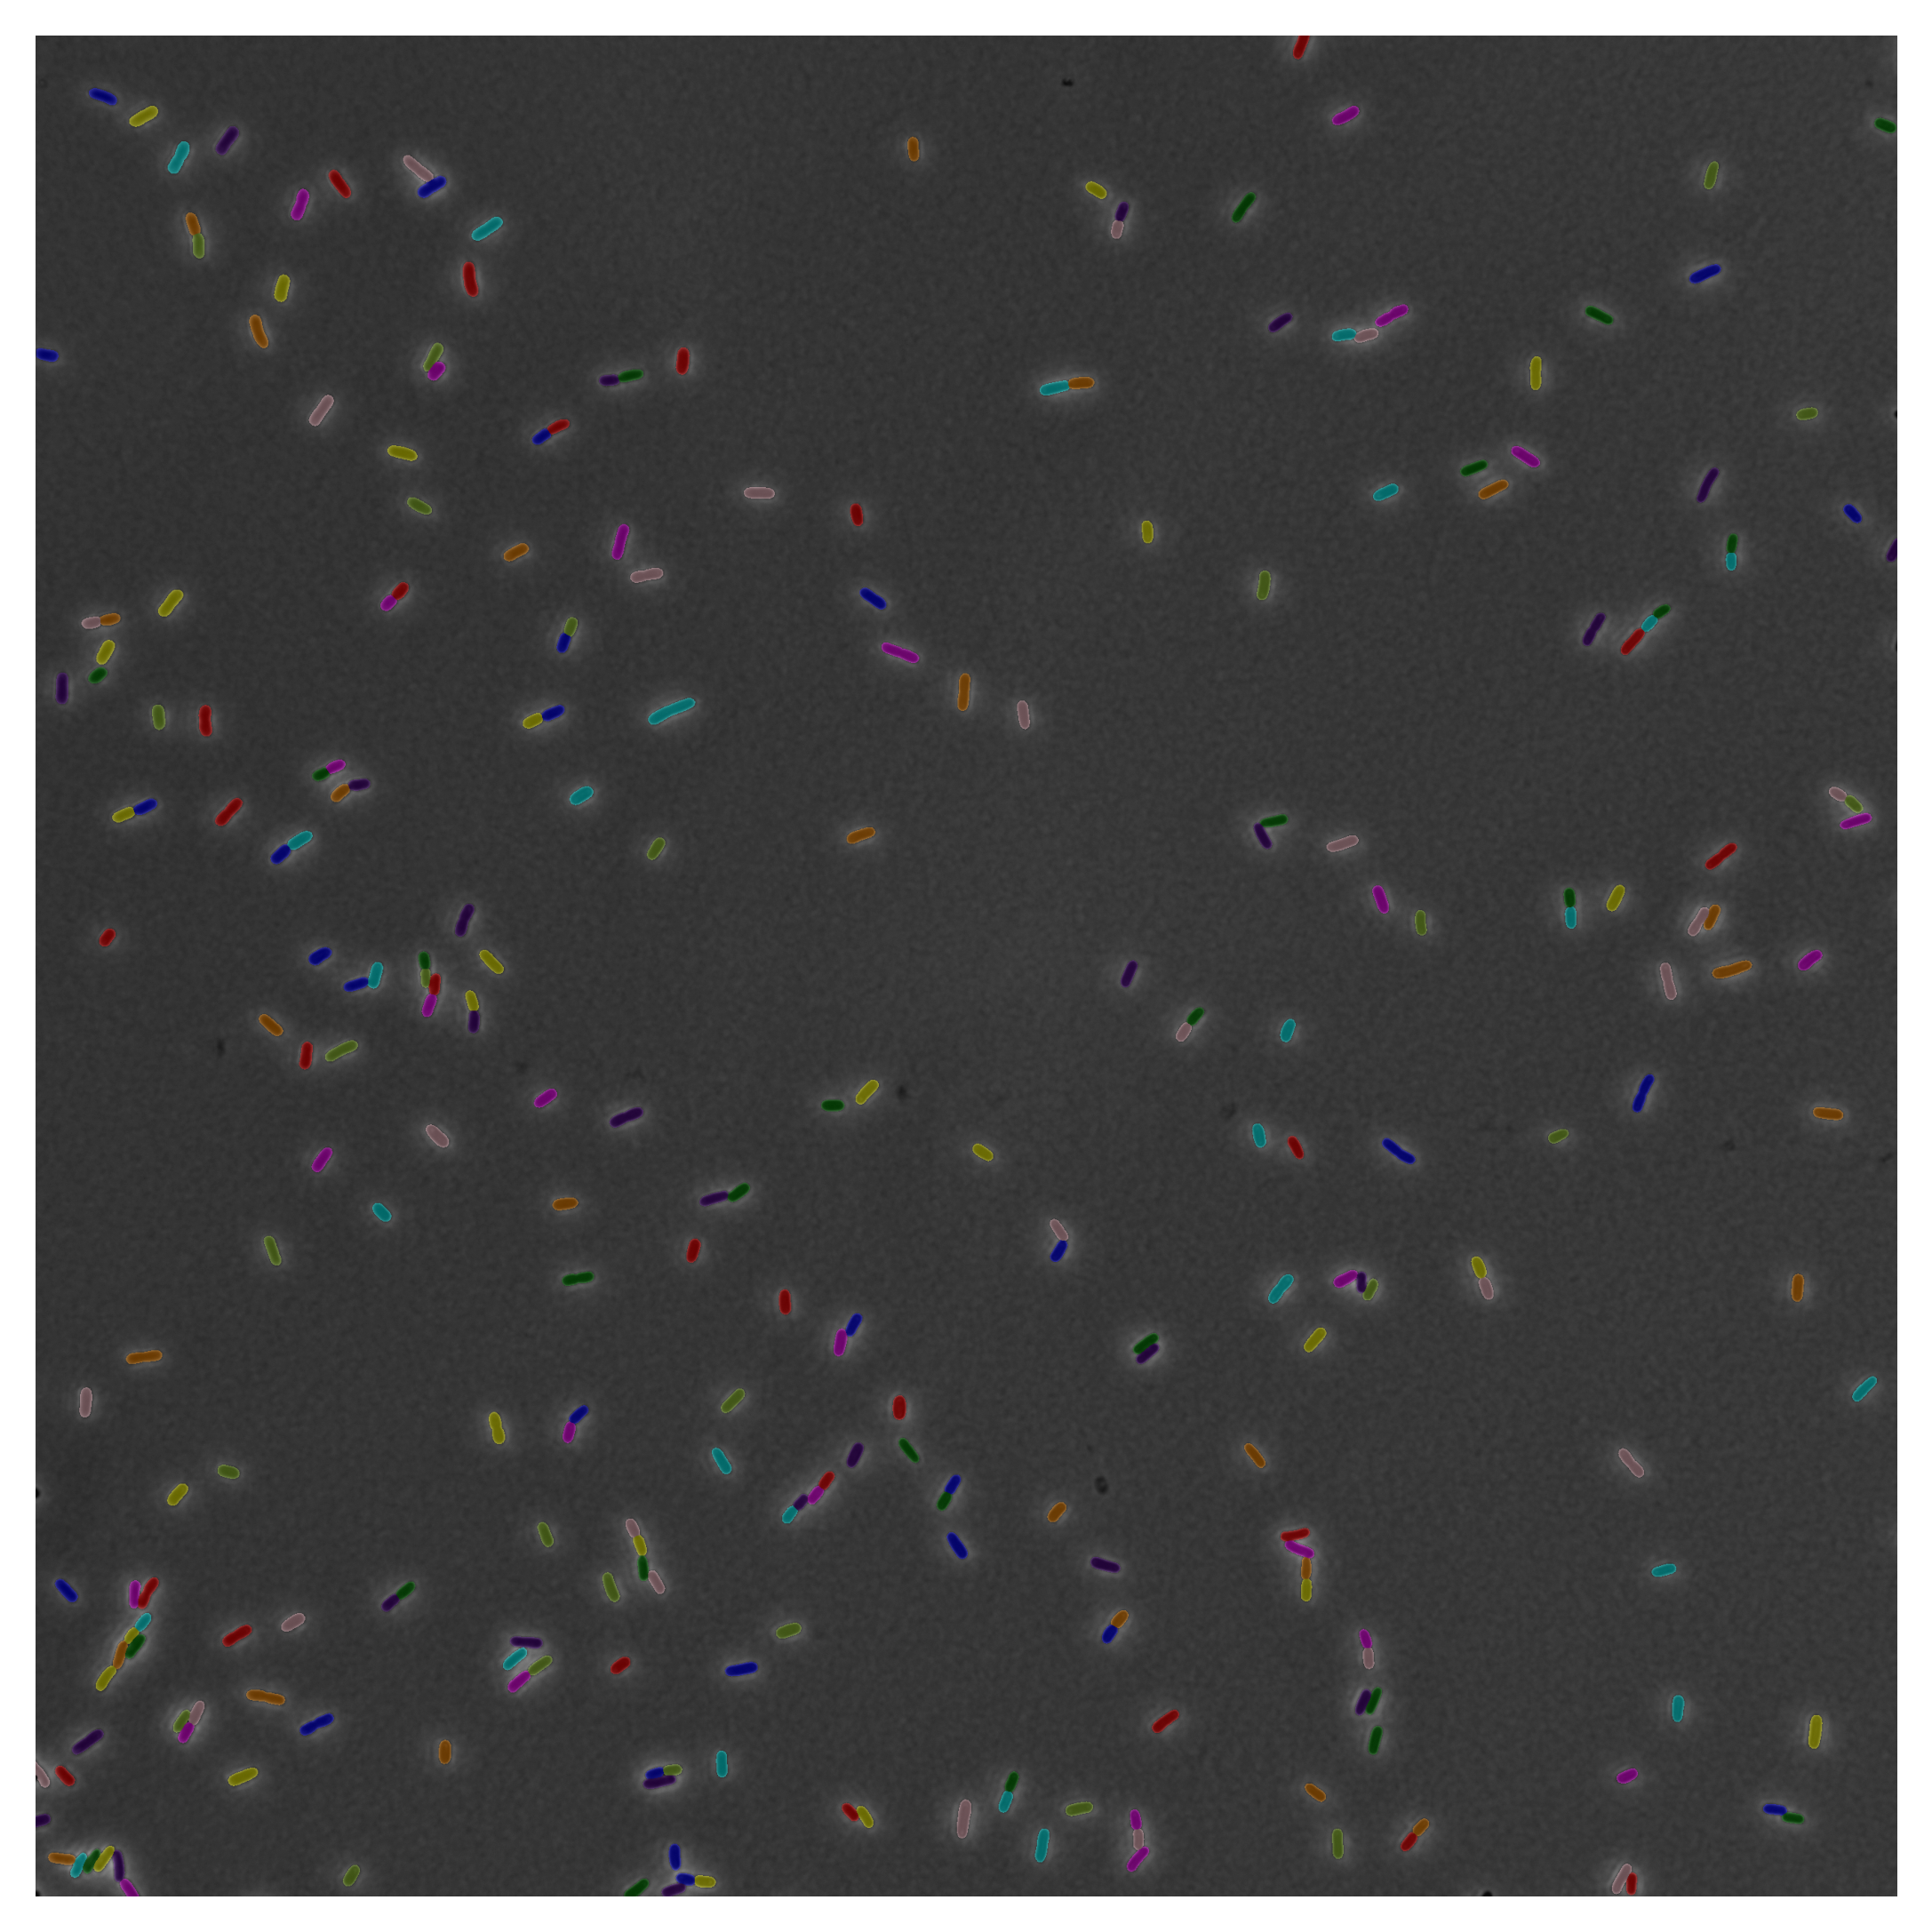

In [4]:
#Check segmentation
ic.create_image_objects(phase_channel=channel1)
bplt.plot_mask(ic.image_objects[0], joined=False, alpha=0.4) # Visualize the masks

In [5]:
# Process masks into meshes...
ic.batch_process_mesh(object_list = None, # 'None' will process the entire folder. ic.image_objects[0] will process only the first.
                      phase_channel = channel1,
                      join_thresh = 4, # join threshold in pixel
                      split_thresh = 0.5, # reduce the value if cells do not split when they should
                      CD_width=False, # False = constriction degree measurement based on signal*width -> True = CD measurement based on width alone
                      smoothing = 0.1,
                      save_data = True) # Save the data to a .pkl file.




2024-09-11 15:27:53,699 [INFO] PROCESSING IMAGE: TL14_SGL711_M9glu_12H_XY0_C1.tiff
2024-09-11 15:27:53,702 [INFO] >>> Joining cells ...


100%|██████████| 275/275 [00:10<00:00, 26.93it/s]


2024-09-11 15:28:16,957 [INFO] >>> Creating meshes from joined masks ...


100%|██████████| 232/232 [00:10<00:00, 22.50it/s]


2024-09-11 15:28:28,074 [INFO] >>> Splitting cells ...


100%|██████████| 232/232 [00:00<00:00, 265.41it/s]

Cell objects are created from processed meshes. 240 Cell objects are created.


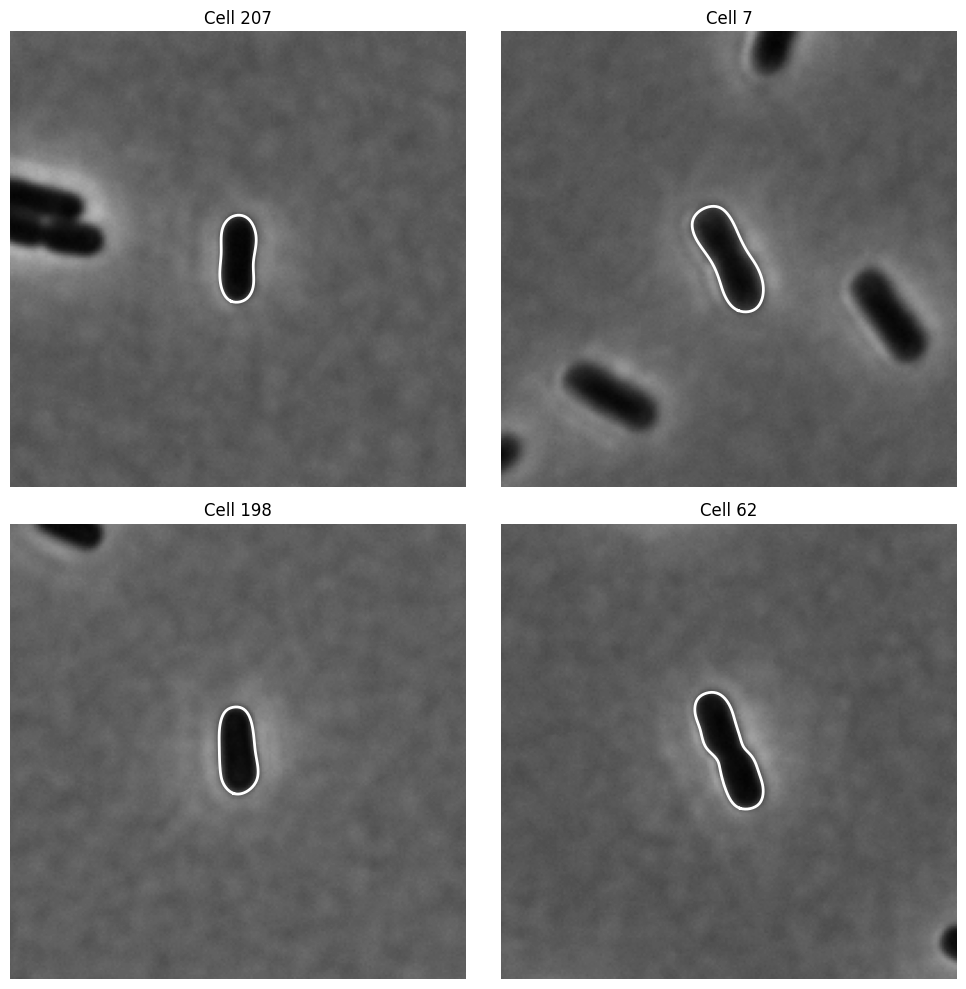

Amount of cells after mesh construction: 240


In [10]:
bplt.plot_random_contours(ic.image_objects[0], crop_size =200)
print(f'Amount of cells after mesh construction: {len(ic.mesh_df_collection)}' )

In [7]:
# Calculate morphological features
chann_method_tuple = [
    ([None], "morphological")
    ]
dataframe = ic.batch_calculate_features(chann_method_tuple, 
                                        all_data=False, 
                                        reset=True, max_mesh_size=800)
resulting_df = ic.merge_dataframes()
resulting_df.head()

2024-09-11 15:28:30,105 [INFO] PROCESSING CHANNEL: None, method: morphological


100%|██████████| 1/1 [00:03<00:00,  3.00s/it]


,image_name,cell_id,frame,cell_SOV,cell_area,cell_area_asymmetry,cell_aspect_ratio,cell_circularity,cell_compactness,cell_constriction_degree_axial,...,moments_normalized_1_2,moments_normalized_1_3,moments_normalized_2_0,moments_normalized_2_1,moments_normalized_2_2,moments_normalized_2_3,moments_normalized_3_0,moments_normalized_3_1,moments_normalized_3_2,moments_normalized_3_3
0,TL14_SGL711_M9glu_12H_XY0_C1.tiff,0,0,4.210808,2.205543,0.784313,2.659456,0.730628,17.199401,0.015002,...,-0.002768,-0.007488,0.165317,0.000524,0.010751,0.000870,0.004485,-0.016003,-0.000773,-0.002080
1,TL14_SGL711_M9glu_12H_XY0_C1.tiff,1,0,4.310778,2.445887,0.976937,2.795555,0.721855,17.408433,0.002575,...,0.001835,0.019557,0.054087,0.001985,0.011137,0.000668,0.000962,0.007002,0.000537,0.002112
2,TL14_SGL711_M9glu_12H_XY0_C1.tiff,2,0,3.825375,2.930832,0.968472,2.634679,0.748887,16.780061,0.015069,...,0.000027,-0.019825,0.072112,0.000320,0.013031,0.000115,-0.000252,-0.010195,-0.000155,-0.002652
3,TL14_SGL711_M9glu_12H_XY0_C1.tiff,3,0,4.195982,2.502129,0.960146,2.660692,0.735901,17.076159,0.018563,...,-0.000234,-0.020968,0.070810,0.001760,0.013444,0.000153,-0.001703,-0.010125,-0.000369,-0.002789
4,TL14_SGL711_M9glu_12H_XY0_C1.tiff,4,0,4.069501,2.018247,0.955881,2.031342,0.851461,14.758595,0.022729,...,-0.000851,0.009044,0.056260,-0.000041,0.006980,-0.000083,0.000281,0.004523,-0.000062,0.000934


In [8]:
# Save the dataframe to a .pkl file in the same folder as the images
ic.dataframe_to_pkl()

In [9]:
# Check all cells
#plot = [bplt.plot_contour(cell.cell_id, image) for image in ic.image_objects for cell in image.cells]
